In [ ]:
import numpy as np

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense

from keras.layers import GlobalAveragePooling2D

from keras.optimizers import Adadelta

import matplotlib.pyplot as plt

In [ ]:
#========================================================
#   Simple image plotting routine
#========================================================
def tvscale(img, plot_size=(6,6)):
    plt.rcParams['figure.figsize'] = plot_size
    imgplot = plt.imshow(img,interpolation="none",cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
X1 = np.load('/content/drive/MyDrive/Cursos/cosmo-late.npy')
X2 = np.load('/content/drive/MyDrive/Cursos/cosmo-early.npy')

X1.shape

(301, 128, 128, 3)

In [ ]:
#--- Concatenate early and late sets. Simple pre-processing
X = np.concatenate((X1,X2), axis=0)

#--- IMPORTANT!!! DO NOT NORMALIZE !!!
#X = X.astype(np.float32)/256.0 

#--- Assign classes
Y = np.zeros((X.shape[0]))
Y[0:len(X1)] = 1 #--- Late is 0, early 1
print(Y.shape)


#--- Get random indexes
rand_ind = ( np.arange(0,X.shape[0]) ) 
np.random.shuffle(rand_ind)

#--- Shuffle data
X = X[rand_ind]
Y = Y[rand_ind]


(602,)


In [ ]:
#--- Define training and test datasets

X_train = X[50:]
Y_train = Y[50:]

X_test = X[0:50]
Y_test = Y[0:50]


In [ ]:
#--- Load pre-trained VGG16
model = VGG16(weights='imagenet',include_top=False, input_shape=(128,128,3))

#--- Freeze convolutional layers
for layer in model.layers:
  layer.trainable = False

#--- Append new head
#x = model.output 
x = model.get_layer('block4_conv3').output # 2
x = GlobalAveragePooling2D()(x) # 2

x = Flatten()(x)
x = Dense(512, activation='relu', name='dense1')(x)
x = Dense(32, activation='relu',name='dense2')(x)
x = Dropout(0.3)(x)

out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.input, outputs=out)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [ ]:
history = model.fit( preprocess_input(X_train), Y_train, batch_size=10, epochs=10, shuffle=True)

Epoch 1/10
56/56 [==============================] - 45s 30ms/step - loss: 3.3086 - accuracy: 0.6833
Epoch 2/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1969 - accuracy: 0.9294
Epoch 3/10
56/56 [==============================] - 1s 19ms/step - loss: 0.2388 - accuracy: 0.9122
Epoch 4/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1817 - accuracy: 0.9243
Epoch 5/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1566 - accuracy: 0.9459
Epoch 6/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1094 - accuracy: 0.9565
Epoch 7/10
56/56 [==============================] - 1s 19ms/step - loss: 0.0954 - accuracy: 0.9684
Epoch 8/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1280 - accuracy: 0.9394
Epoch 9/10
56/56 [==============================] - 1s 19ms/step - loss: 0.0916 - accuracy: 0.9761
Epoch 10/10
56/56 [==============================] - 1s 19ms/step - loss: 0.1829 - accuracy: 0.9430


In [ ]:
#--- Lets check the test dataset

#--- Predict class
Y_pred = np.round(model.predict(X_test[0:50]))[:,0]

#--- Get errors
equal = np.where((Y_pred[0:50]-Y_test[0:50]) == 0)[0]

print(len(equal)/50.0 )

#--- Display some predictions and their actual value
for i in range(20):
  print(Y_test[i].astype(np.uint8), Y_pred[i].astype(np.uint8))

0.98
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0


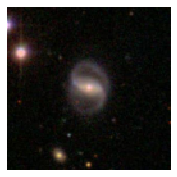

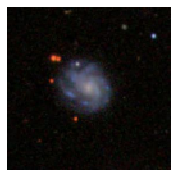

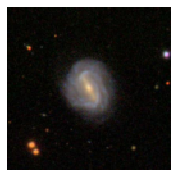

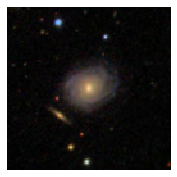

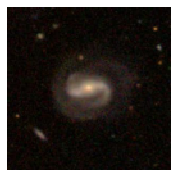

In [ ]:

#--- Now lets get some predictions again to display their corresponding images
early = np.where(Y_pred == 0)[0]
late  = np.where(Y_pred == 1)[0]

for i in range(5):
  tvscale(X_test[late[i]], plot_size=[3,3])